# Import necessary library to mount file

In [91]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Import the required libraries

In [92]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

# Loading the Dataset


In [93]:
df = pd.read_csv("/content/drive/MyDrive/Kaggle_Datasets/US_Accidents_Dec20_Updated.csv")

In [94]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day


### Characteristics of the dataset

The dataset appears to have a total of approximately 2.9 Million rows and 47 columns including 1 target column

In [6]:
df.shape

(2906610, 47)

Let's observe all the column names given in the dataset

In [7]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

# Preporcessing
### The following dataset consists of features belonging to almost all datatypes. We have 20 features with data type object as they are string features, 13 features have float datatype, 13 features have bool datatype and 1 feature which is also the target varibale is having int data type


### The file size is more than 790 MB

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

# Let's now observe the stats of the dataset

#### We have a lot of missing values expecially in columns Number, Wind_Speed(mph), WInd_Chill(F) and Precipitation(in) compared to other columns

In [9]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


# warmer or colder areas acidents?

# which state have highetsnum er of accidnets

# accidents per capita

# Lets observe the count of Null values in the dataset

In [10]:
df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                   282821
End_Lng                   282821
Distance(mi)                   0
Description                    0
Number                   1891672
Street                         0
Side                           0
City                         108
County                         0
State                          0
Zipcode                     1114
Country                        0
Timezone                    3430
Airport_Code                6608
Weather_Timestamp          46917
Temperature(F)             67224
Wind_Chill(F)            1183859
Humidity(%)                71270
Pressure(in)               56908
Visibility(mi)             72078
Wind_Direction             63474
Wind_Speed(mph)           307163
Precipitation(in)        1301326
Weather_Condition          71851
Amenity   

### Let's observe the length of the numerical columns. Since there are 47 columns in total it may be difficult to identify hence will perform this step

In [11]:
# numeric columns

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)

In [12]:
len(newdf.columns)

14

In [13]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [14]:
df["City"]

0                Greenville
1                 Charlotte
2                 Los Gatos
3               Carson City
4           Fort Lauderdale
                 ...       
2906605             Houston
2906606              Colton
2906607               Miami
2906608      Salt Lake City
2906609    Colorado Springs
Name: City, Length: 2906610, dtype: object

In [15]:
len(df.City.unique())

11790

## Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).**


#### From the below stats we can see that majority of accidents have Severity 2 with approximately 73.2 % 

#### This means the delay in trafic may not extend to greater extend but to a minimal extent.

In [16]:
sev_percent = (df["Severity"].value_counts()/df.shape[0])*100
print(sev_percent)

2    73.255889
3    21.655881
4     4.099071
1     0.989159
Name: Severity, dtype: float64


### The above percent count in graphical view using count plot

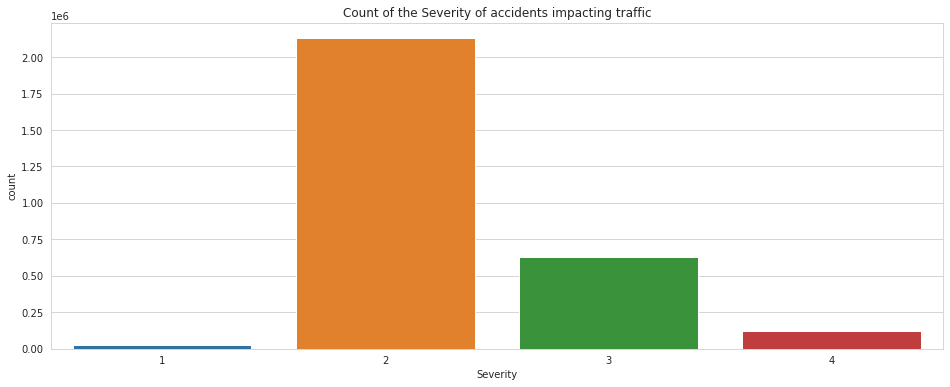

In [18]:
plt.figure(figsize=(16, 6))
sns.set_style("whitegrid")
sns.countplot(x="Severity", data=df).set(title='Count of the Severity of accidents impacting traffic')
plt.show()

# Lets observe the values in Weather_Condition column.

#### We can see that approximately 23.83% weather condition is "Fair" and approximately 17.16% weather condition is "Clear"

#### Majority of traffic issues may have happened on regular days compared to other weather conditions

In [17]:
sev_percent = (df["Weather_Condition"].value_counts()/df.shape[0])*100
print(sev_percent)

Fair                      23.831199
Clear                     17.165186
Mostly Cloudy             13.284273
Partly Cloudy              9.249641
Cloudy                     8.430921
                            ...    
Heavy Smoke                0.000034
Sleet / Windy              0.000034
Mist / Windy               0.000034
Heavy Freezing Drizzle     0.000034
Freezing Rain / Windy      0.000034
Name: Weather_Condition, Length: 128, dtype: float64


### Lets observe if there is any relationship between the severity of accidnets and the twilight.

#### We got to know from the previous graph that Severity level 2 is the highest and in this plot its appears that traffic issue and accidents happen in the Daytime more than Night

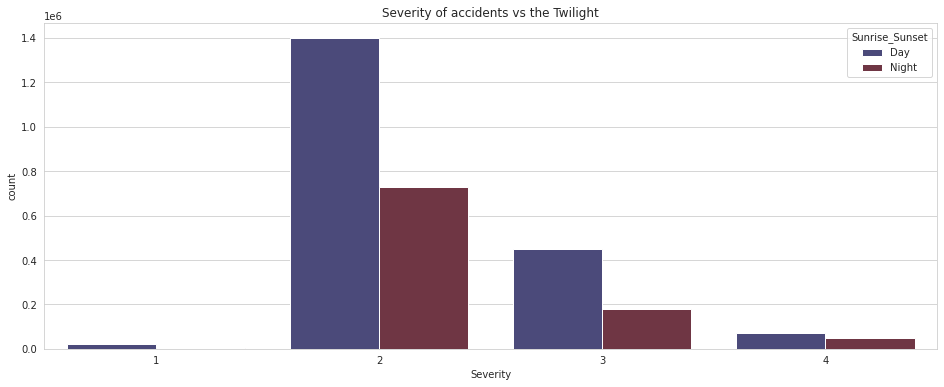

In [19]:
plt.figure(figsize=(16, 6))
sns.set_style("whitegrid")
sns.countplot(x="Severity", hue="Sunrise_Sunset", data=df, palette="icefire").set(title='Severity of accidents vs the Twilight')
plt.show()

### Lets observe if there is any relationship between Severity and Temperature

#### We can observe the severity of accidents are majorly between 1 and 2.

#### Accidents seems to occur somewhere between 50 F (10 C) to 100 F (37 C). Coldest temperature could be from -30 F ( -34.4 C 

#### We can see majority of accidents may occur during colder temperatures and wind speed seems to affect the temperature.

#### We know in US, Boston and Chicago are the cities with highest winds averaging above 10 mph and as per the plot wind speed is maximun for few area only

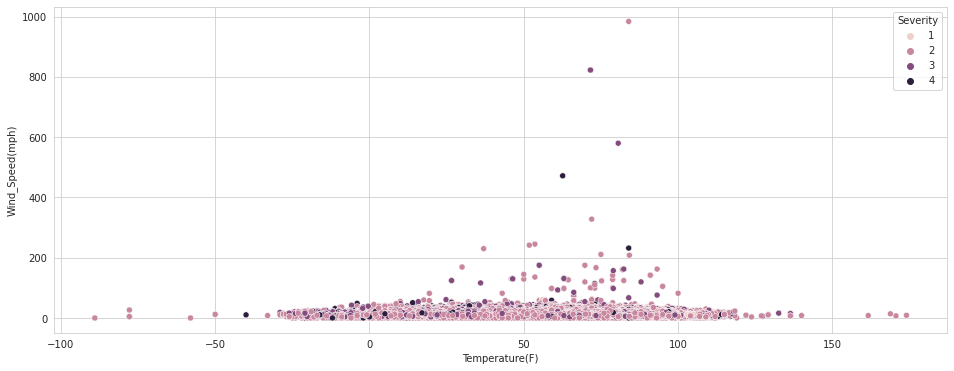

In [20]:
plt.figure(figsize=(16, 6))
sns.scatterplot(data=df, x="Temperature(F)", y="Wind_Speed(mph)", hue="Severity")


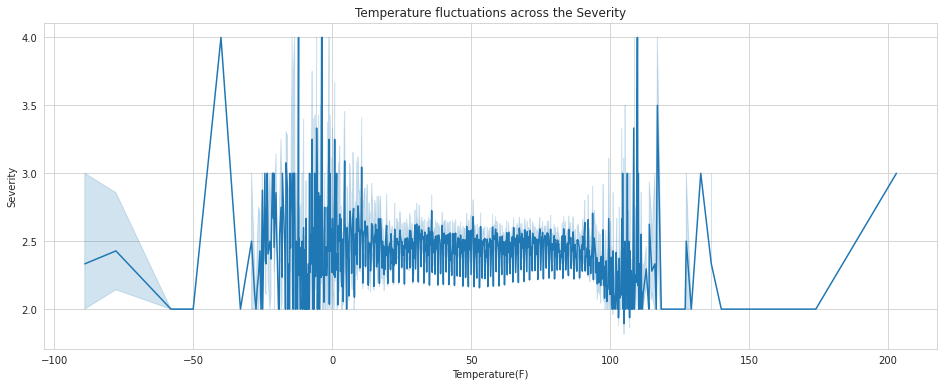

In [99]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(x="Temperature(F)", y="Severity", data=df, palette="icefire").set(title='Temperature fluctuations across the Severity')
plt.show()

### Shows the period of day (i.e. day or night) based on Twilight.

### Civil Twilight : Civil twilight is the period when enough natural light remains that artificial light is not needed.

### Nautical Twilight: Nautical twilight is the period when enough natural light remains but artificial light is also  needed. 

### Astronomical Twilight: Astronomical twilight is the period when natural light is not enough and  artificial light very much  needed.




In [21]:
df["Civil_Twilight"].value_counts()

Day      2073629
Night     832871
Name: Civil_Twilight, dtype: int64

In [22]:
df["Nautical_Twilight"].value_counts()

Day      2212270
Night     694230
Name: Nautical_Twilight, dtype: int64

In [23]:
df["Astronomical_Twilight"].value_counts()

Day      2321705
Night     584795
Name: Astronomical_Twilight, dtype: int64

### If we observe the plot, there is no much difference in the dominance of twilight and alsmost all 3 twilights have newaly same amout of days and nights

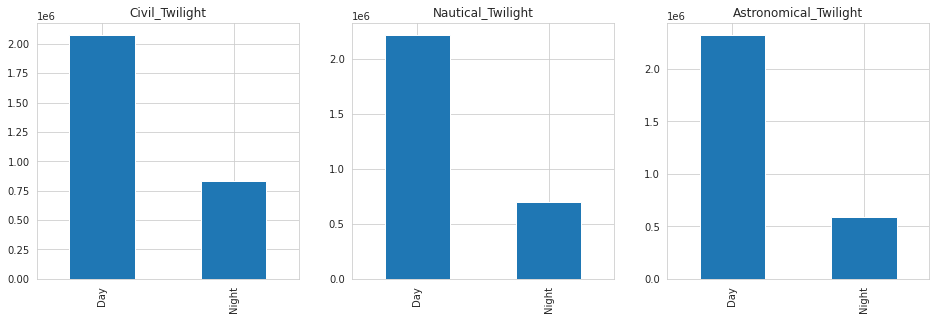

In [24]:
# Set up a grid of plots
fig = plt.figure(figsize=(16,16)) 
fig_dims = (3, 3)


# Plot accidents depending on type
plt.subplot2grid(fig_dims, (0, 0))
df['Civil_Twilight'].value_counts().plot(kind='bar', 
                                     title='Civil_Twilight')
plt.subplot2grid(fig_dims, (0, 1))
df['Nautical_Twilight'].value_counts().plot(kind='bar', 
                                     title='Nautical_Twilight')
plt.subplot2grid(fig_dims, (0, 2))
df['Astronomical_Twilight'].value_counts().plot(kind='bar', 
                                     title='Astronomical_Twilight')

plt.show()

### Lets observe if there is any relationship between severity and timezone

### From the below plot, we can see that majority of traffic blocks due to accidents seem to occur in "US/Eastern" timezone and have a Severity of 2 followed by 3


### US Eastern is majorly a coastline area and also a hilly area. This could be one of the factors contributing in the secerity of traffic  

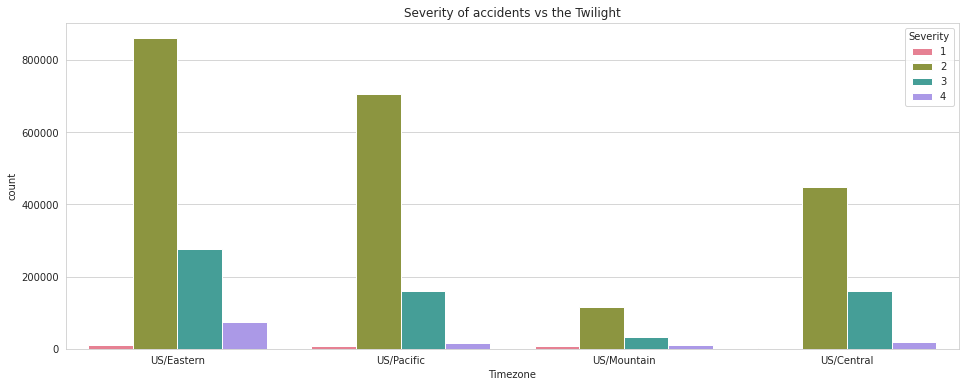

In [26]:
plt.figure(figsize=(16, 6))
sns.set_style("whitegrid")
sns.countplot(x="Timezone", hue="Severity", data=df, palette="husl").set(title='Severity of accidents vs the Twilight')
plt.show()

### From the below plot we can observe that sevrity of accidents / traffic may also depen on turning loop.

### No proper signs, too many vehicles etc could be one of the factors contributing in this scenario

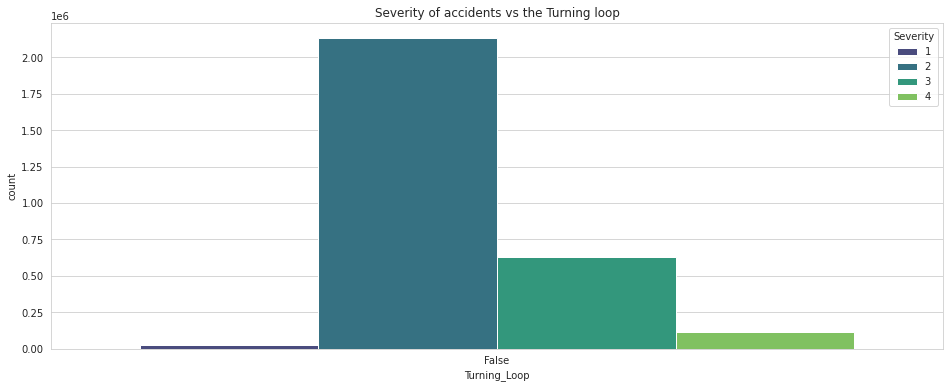

In [96]:
plt.figure(figsize=(16, 6))
sns.set_style("whitegrid")
sns.countplot(x="Turning_Loop", hue="Severity", data=df, palette="viridis").set(title='Severity of accidents vs the Turning loop')
plt.show()

### From the below plot, it appears the accidents may occur at a signal.

### It could be because of people not following traffic rules, may continue driving in stop signal areas, stopping the overspeeding vehicle suddenly, bumping into other vehicles etc could be the reasons for this  

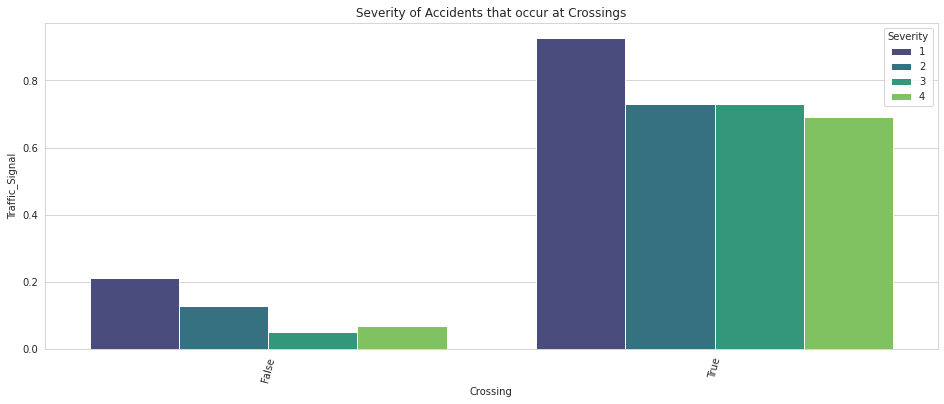

In [97]:
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="Crossing", y="Traffic_Signal", data=df, palette="viridis", ci=None, orient="v", hue="Severity").set(title='Severity of Accidents that occur at Crossings')
plt.xticks(rotation=75)
plt.show()

### From the below plot we can see that accidents do occur at railway crossings that have a signal.

### Although the severity of accident 1 is more, we can also see Severity 2 and 4 also.

### Major accidents may take place when crossing the vehicle

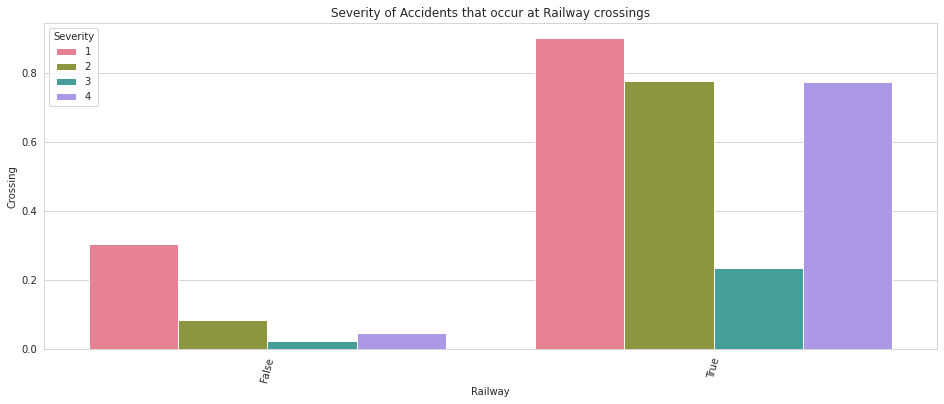

In [98]:
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="Railway", y="Crossing", data=df, palette="husl", ci=None, orient="v", hue="Severity").set(title='Severity of Accidents that occur at Railway crossings')
plt.xticks(rotation=75)
plt.show()

### From the below plot we can see accidents happeing at a junction which is anyways common resulting in traffic jam. The severity is 1 and is very low.

### At a junction that has no signal, the comparison is very less

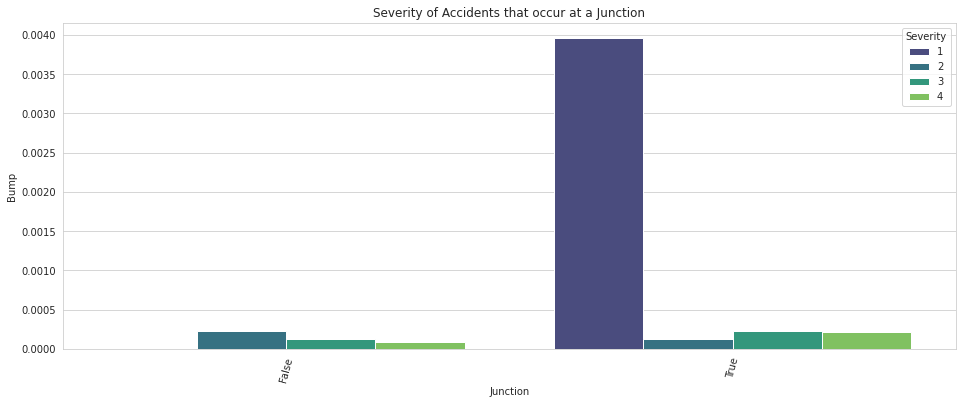

In [30]:
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="Junction", y="Bump", data=df, palette="viridis", ci=None, orient="v", hue="Severity").set(title='Severity of Accidents that occur at a Junction')
plt.xticks(rotation=75)
plt.show()

### From the below plot it appears the accidents occur at one way roads irrespective of turning loops.

### Severity 1 and 2 happen at roundabouts having no turing loop and severity 4 can happen at a one way road with a turning loop.

### Sudden diversions without proper lighting or signs could lead to such Severities



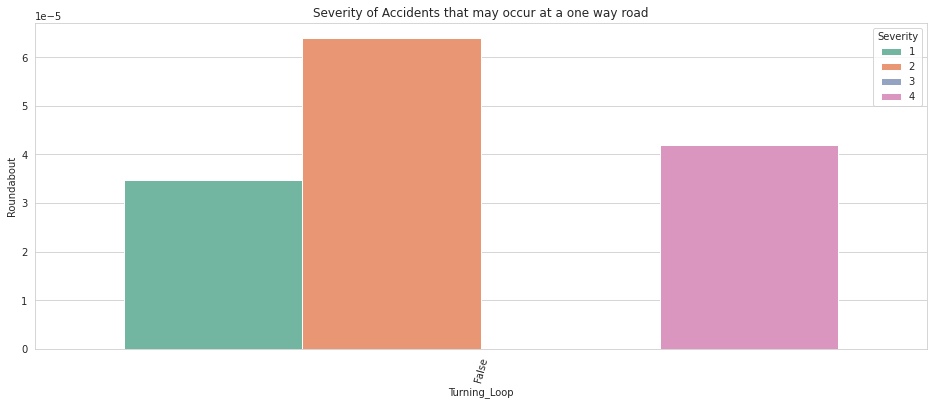

In [31]:
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="Turning_Loop", y="Roundabout", data=df, palette="Set2", ci=None, orient="v", hue="Severity").set(title='Severity of Accidents that may occur at a one way road')
plt.xticks(rotation=75)
plt.show()

### No exists are dead ends and from the below plot, accidents don't occur at such places. Main roads don't generally have no exits and could probaly be side roads that leads nowhere

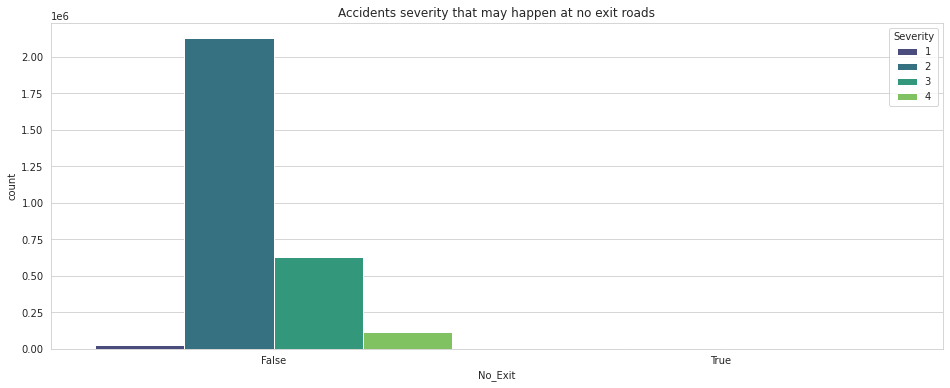

In [32]:
plt.figure(figsize=(16, 6))
sns.set_style("whitegrid")
sns.countplot(x="No_Exit", hue="Severity", data=df, palette="viridis").set(title='Accidents severity that may happen at no exit roads')
plt.show()

### Cities by accident

#### We can see "Los Angeles" and "Houston" have highest accidents followed by "Charolette", "Miami" and "Dallas" compared to remaining places


In [33]:
cities_by_accident = df["City"].value_counts()
cities_by_accident

Los Angeles    68411
Houston        68265
Charlotte      56176
Miami          49965
Dallas         48525
               ...  
Trevor             1
Penitas            1
Belhaven           1
Cedar Crest        1
Hendricks          1
Name: City, Length: 11789, dtype: int64

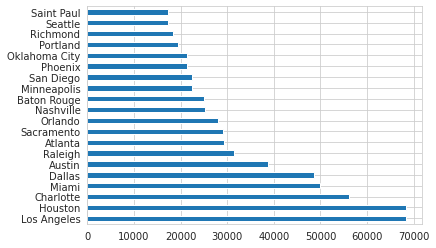

In [34]:
cities_by_accident[:20].plot(kind="barh")

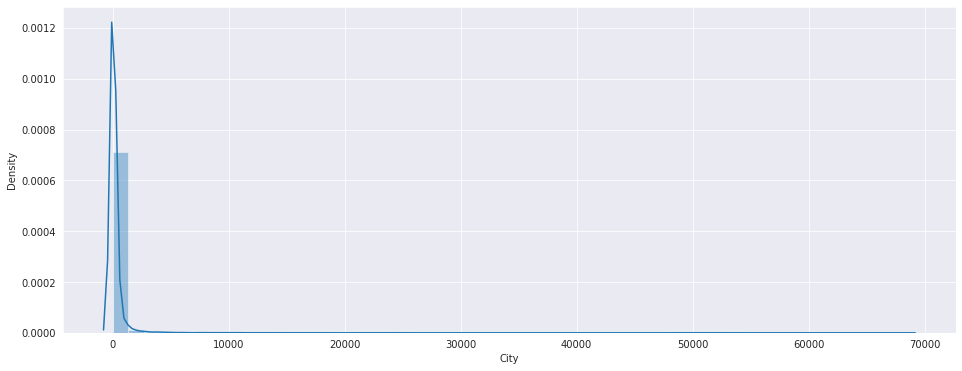

In [35]:
plt.figure(figsize=(16, 6))
sns.set_style("darkgrid")
sns.distplot(cities_by_accident)

### Highest and Lowest accidents

#### Lets assume accidents more than 1000 are highest and vice versa as lowest

In [36]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident < 1000]

In [37]:
len(high_accident_cities) / len(cities_by_accident)

0.04351514123335313

In [39]:
len(low_accident_cities) / len(cities_by_accident)

0.9564848587666469

## From the below graphs we can see that the number of accidents per city decreases / increases exponentially

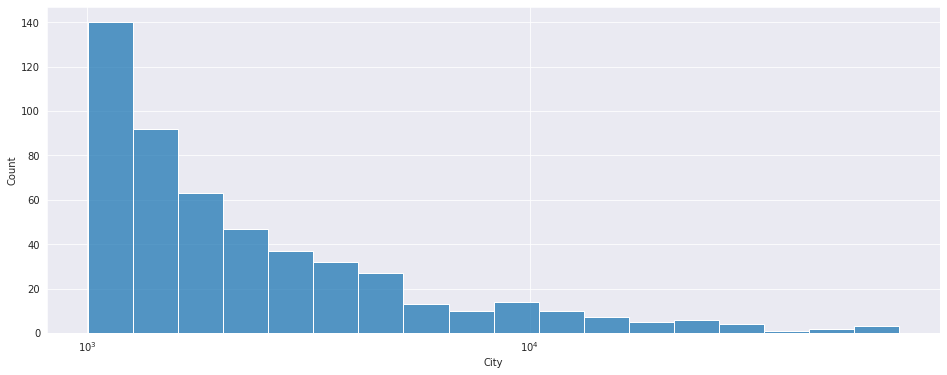

In [38]:
plt.figure(figsize=(16, 6))
sns.histplot(high_accident_cities, log_scale=True)

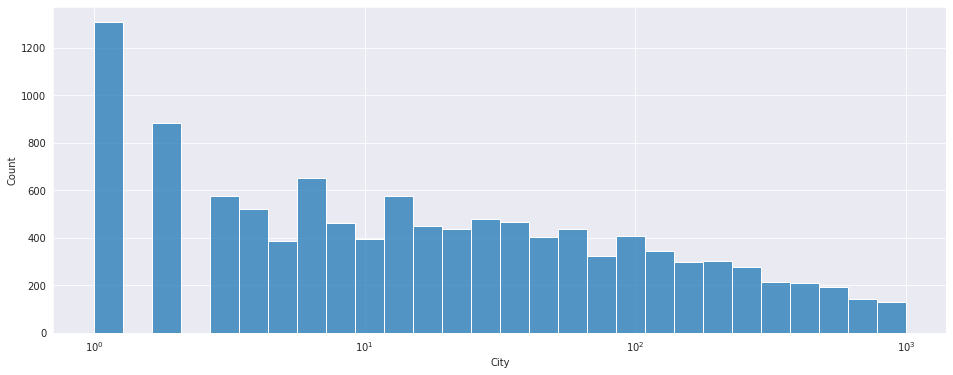

In [40]:
plt.figure(figsize=(16, 6))
sns.histplot(low_accident_cities, log_scale=True)

In [41]:
#over 1200 citues have reported just 1 accident (neeed to investigate)

cities_by_accident[cities_by_accident==1]

South Abington Township    1
Odenville                  1
Shabbona                   1
Vickery                    1
Pansey                     1
                          ..
Trevor                     1
Penitas                    1
Belhaven                   1
Cedar Crest                1
Hendricks                  1
Name: City, Length: 1306, dtype: int64

In [42]:
# start

df["Start_Time"]= pd.to_datetime(df["Start_Time"])

In [43]:
df["Start_Time"][0]

Timestamp('2019-05-21 08:29:55')

### From the below plot we can see that high perentage of accidents seem to occur between 7 AM to 9 AM. People could be in a hurry, people go to work etc.

### The next highest pecentage is between 3PM to 6PM and on other time there is less peak of accidents

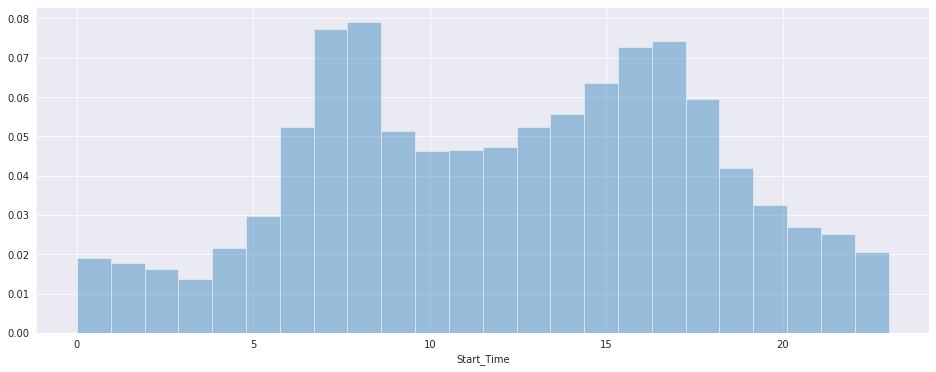

In [44]:
plt.figure(figsize=(16, 6))
sns.distplot(pd.DatetimeIndex(df['Start_Time']).hour, bins=24, norm_hist=True, kde=False)

### From the below plot, we can see accidents seem to occur less on a weekend compared to weekdays

### People don't travel much on weekend and if they do may prefer outskirts than the city area hence due to less crowd accidenst are avoided to some extent.

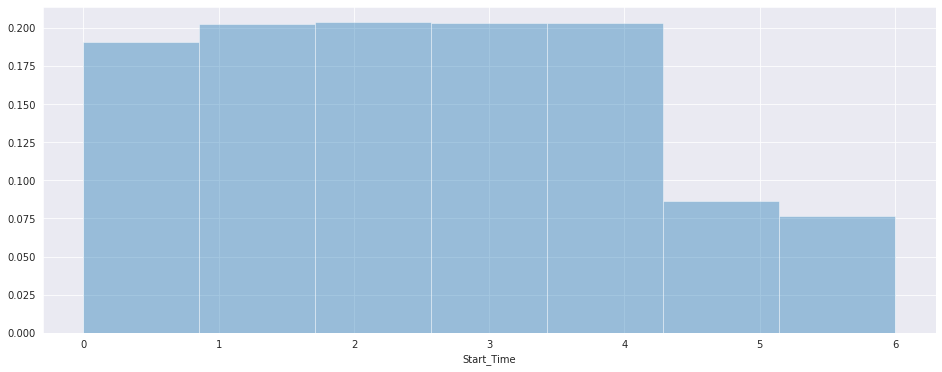

In [45]:
plt.figure(figsize=(16, 6))
sns.distplot(df['Start_Time'].dt.dayofweek, bins=7, norm_hist=True, kde=False)


# acidents appears less on weekends, if travellin that may not be work

### The below plot shows the peak hour when accidents occur on a Monday

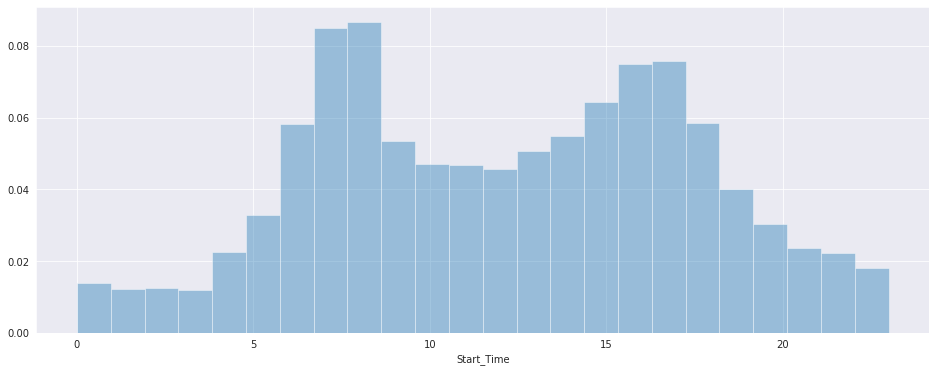

In [47]:
plt.figure(figsize=(16, 6))
mondays = df.Start_Time[df.Start_Time.dt.dayofweek==0]

sns.distplot(mondays.dt.hour, bins=24, norm_hist=True, kde=False)

### Distribution of accidents as per month

### We can see that accidents gradually increase from August till December

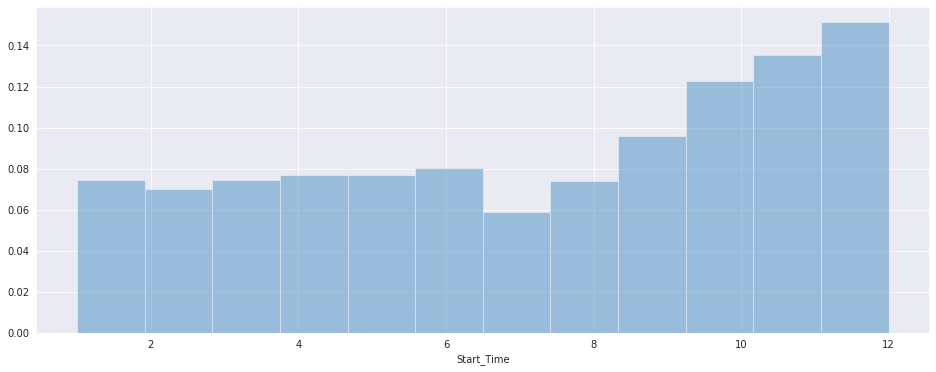

In [48]:
plt.figure(figsize=(16, 6))
sns.distplot(df['Start_Time'].dt.month, bins=12, norm_hist=True, kde=False)

# can u eplain month wise trend of accidents

## Data seems to be missing for the year 2016 and 2017 compared to other years

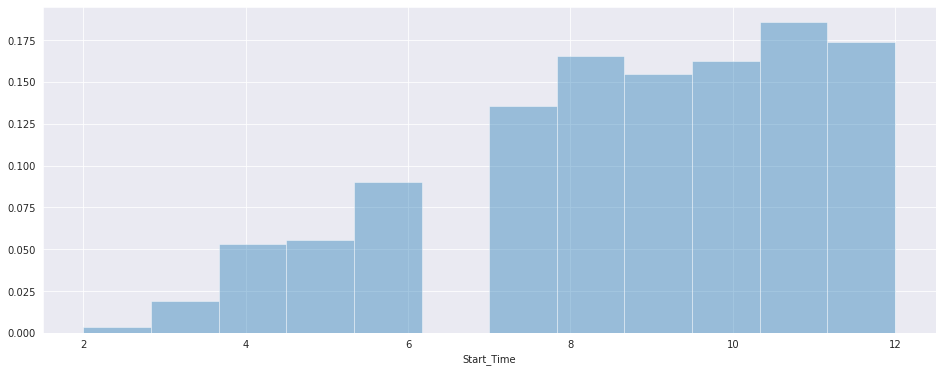

In [49]:
plt.figure(figsize=(16, 6))
df_2016 = df[df.Start_Time.dt.year == 2016]
sns.distplot(df_2016.Start_Time.dt.month, bins=12, norm_hist=True, kde=False)

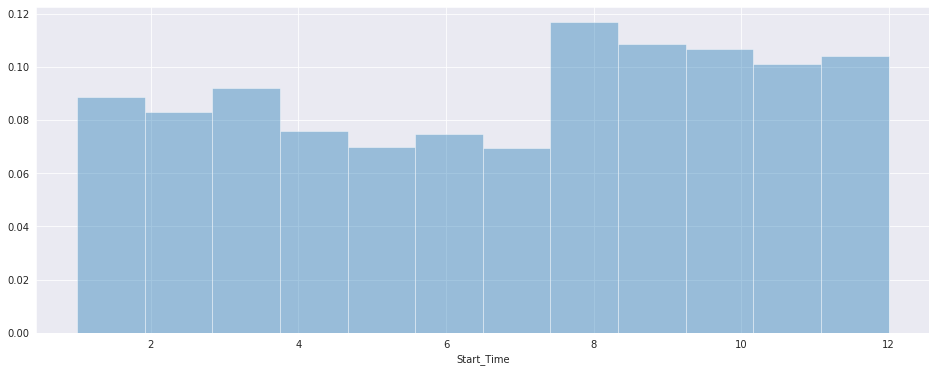

In [50]:
plt.figure(figsize=(16, 6))
df_2017 = df[df.Start_Time.dt.year == 2017]
sns.distplot(df_2017.Start_Time.dt.month, bins=12, norm_hist=True, kde=False)

### Missing values in percentage and aslo plot the same for better understanding

In [51]:
missing_percentages=  df.isnull().sum().sort_values(ascending=False) /len(df)

missing_percentages * 100

Number                   65.081728
Precipitation(in)        44.771263
Wind_Chill(F)            40.729888
Wind_Speed(mph)          10.567740
End_Lat                   9.730270
End_Lng                   9.730270
Visibility(mi)            2.479796
Weather_Condition         2.471986
Humidity(%)               2.451997
Temperature(F)            2.312797
Wind_Direction            2.183781
Pressure(in)              1.957882
Weather_Timestamp         1.614148
Airport_Code              0.227344
Timezone                  0.118007
Zipcode                   0.038326
Nautical_Twilight         0.003784
Astronomical_Twilight     0.003784
Civil_Twilight            0.003784
Sunrise_Sunset            0.003784
City                      0.003716
Amenity                   0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
Distance(mi)              0.000000
Description         

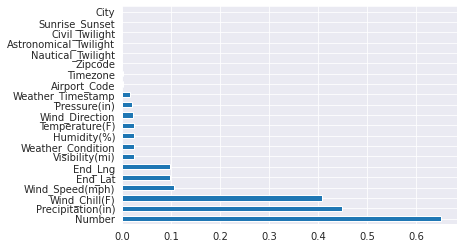

In [52]:
missing_percentages[missing_percentages != 0].plot(kind="barh")

# Drop the columns

In [53]:
df.drop(["ID", "Number", "Precipitation(in)", "Wind_Chill(F)", "Start_Time", "End_Time", "Start_Lat", 
        "Start_Lng", "End_Lat", "End_Lng", "Description", "Number", "Street", "Side", "City", "Zipcode",
        "Country", "Airport_Code","Weather_Timestamp","Wind_Chill(F)", "Humidity(%)", "Pressure(in)", "Wind_Direction",
        "Wind_Speed(mph)", "Precipitation(in)", "Civil_Twilight", "Nautical_Twilight", "Astronomical_Twilight"], axis=1, inplace=True)

In [54]:
df.columns

Index(['Severity', 'Distance(mi)', 'County', 'State', 'Timezone',
       'Temperature(F)', 'Visibility(mi)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset'],
      dtype='object')

In [55]:
df.isnull().sum()

Severity                 0
Distance(mi)             0
County                   0
State                    0
Timezone              3430
Temperature(F)       67224
Visibility(mi)       72078
Weather_Condition    71851
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset         110
dtype: int64

# Handling the missing values of the dataset

In [56]:
# Fill the columns with mean as its continous data

df["Temperature(F)"].fillna(df["Temperature(F)"].mean(), inplace=True)
df["Visibility(mi)"].fillna(df["Visibility(mi)"].mean(), inplace=True)

In [57]:
# Fill the columns with mode as its categorical data

df["Timezone"].fillna(df["Timezone"].value_counts().index[0], inplace=True)
df["Weather_Condition"].fillna(df["Weather_Condition"].value_counts().index[0], inplace=True)
df["Sunrise_Sunset"].fillna(df["Sunrise_Sunset"].value_counts().index[0], inplace=True)


In [58]:
df.isnull().sum()

Severity             0
Distance(mi)         0
County               0
State                0
Timezone             0
Temperature(F)       0
Visibility(mi)       0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Turning_Loop         0
Sunrise_Sunset       0
dtype: int64

# Encoding the dataset


### I have used LabelEncoder to convert the categorical values to numerical as none of the features are ordinal in nature
### Also because, we have more than 47 columns, going with one hot encoding is not an ideal option.


In [59]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()

In [60]:
df_new1 = lab_enc.fit_transform(df["Timezone"])
df_new2 = lab_enc.fit_transform(df["Weather_Condition"])
df_new3 = lab_enc.fit_transform(df["Sunrise_Sunset"])
df_new4 = lab_enc.fit_transform(df["County"])
df_new5 = lab_enc.fit_transform(df["State"])

In [61]:
df["Timezone"] = df_new1
df["Weather_Condition"] = df_new2
df["Sunrise_Sunset"] = df_new3
df["County"] = df_new4
df["State"] = df_new5

In [62]:
df.head()

,Severity,Distance(mi),County,State,Timezone,Temperature(F),Visibility(mi),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,2,0.0,647,38,1,76.0,10.0,13,False,False,False,False,False,False,False,False,False,False,False,False,False,0
1,2,0.0,1004,25,1,76.0,10.0,6,False,False,False,False,False,False,False,False,False,False,False,False,False,0
2,2,1.4,1385,3,3,51.0,10.0,13,False,False,False,False,False,False,False,False,False,False,False,False,False,1
3,2,0.0,469,31,3,53.6,10.0,5,False,False,False,False,False,False,False,False,False,False,False,True,False,0
4,3,0.0,193,8,1,84.2,10.0,80,False,False,False,False,True,False,False,False,False,False,False,True,False,0


In [63]:
df.shape

(2906610, 22)

# Applying Z-score to identify and remove outliers

### I have considered columns "Distance(mi)" and "Temperature(F) as they ahve continous data

### The remaining columns are categorical in nature and applying this method makes no sense.

In [64]:
from scipy.stats import zscore

z_score = zscore(df[["Distance(mi)", "Temperature(F)"]])
abs_zscore = np.abs(z_score)

filtering_entry = (abs_zscore < 3).all(axis=1)

df = df[filtering_entry]



# the data now seems much better than before.

df.describe()

,Severity,Distance(mi),County,State,Timezone,Temperature(F),Visibility(mi),Weather_Condition,Sunrise_Sunset
count,2.861274e+06,2.861274e+06,2.861274e+06,2.861274e+06,2.861274e+06,2.861274e+06,2.861274e+06,2.861274e+06,2.861274e+06
mean,2.282226e+00,2.795022e-01,9.197717e+02,1.973376e+01,1.459926e+00,6.128584e+01,9.122270e+00,4.029309e+01,3.304996e-01
std,5.471591e-01,6.485145e-01,4.398491e+02,1.537440e+01,1.138513e+00,1.779541e+01,2.800003e+00,3.489509e+01,4.703931e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,0.000000e+00,5.670000e+02,3.000000e+00,1.000000e+00,5.000000e+01,1.000000e+01,6.000000e+00,0.000000e+00
50%,2.000000e+00,0.000000e+00,9.160000e+02,1.700000e+01,1.000000e+00,6.210000e+01,1.000000e+01,1.300000e+01,0.000000e+00
75%,3.000000e+00,2.540000e-01,1.302000e+03,3.500000e+01,3.000000e+00,7.500000e+01,1.000000e+01,7.700000e+01,1.000000e+00
max,4.000000e+00,5.175000e+00,1.728000e+03,4.800000e+01,3.000000e+00,1.150000e+02,1.400000e+02,1.270000e+02,1.000000e+00


In [65]:
df.shape

(2861274, 22)

### Percentage of Data Loss

#### It is told that if the data loss is more than 7 to 8%, we may not get accurate results. In this case there is approximately 1.5 % reduced even after applying z-score

In [66]:
# Percentage data loss:

loss_percent = (2906610-2861274)/2906610*100
print(loss_percent)

1.5597551787133466


# Distribution of all the columns in the dataset (post z-score)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


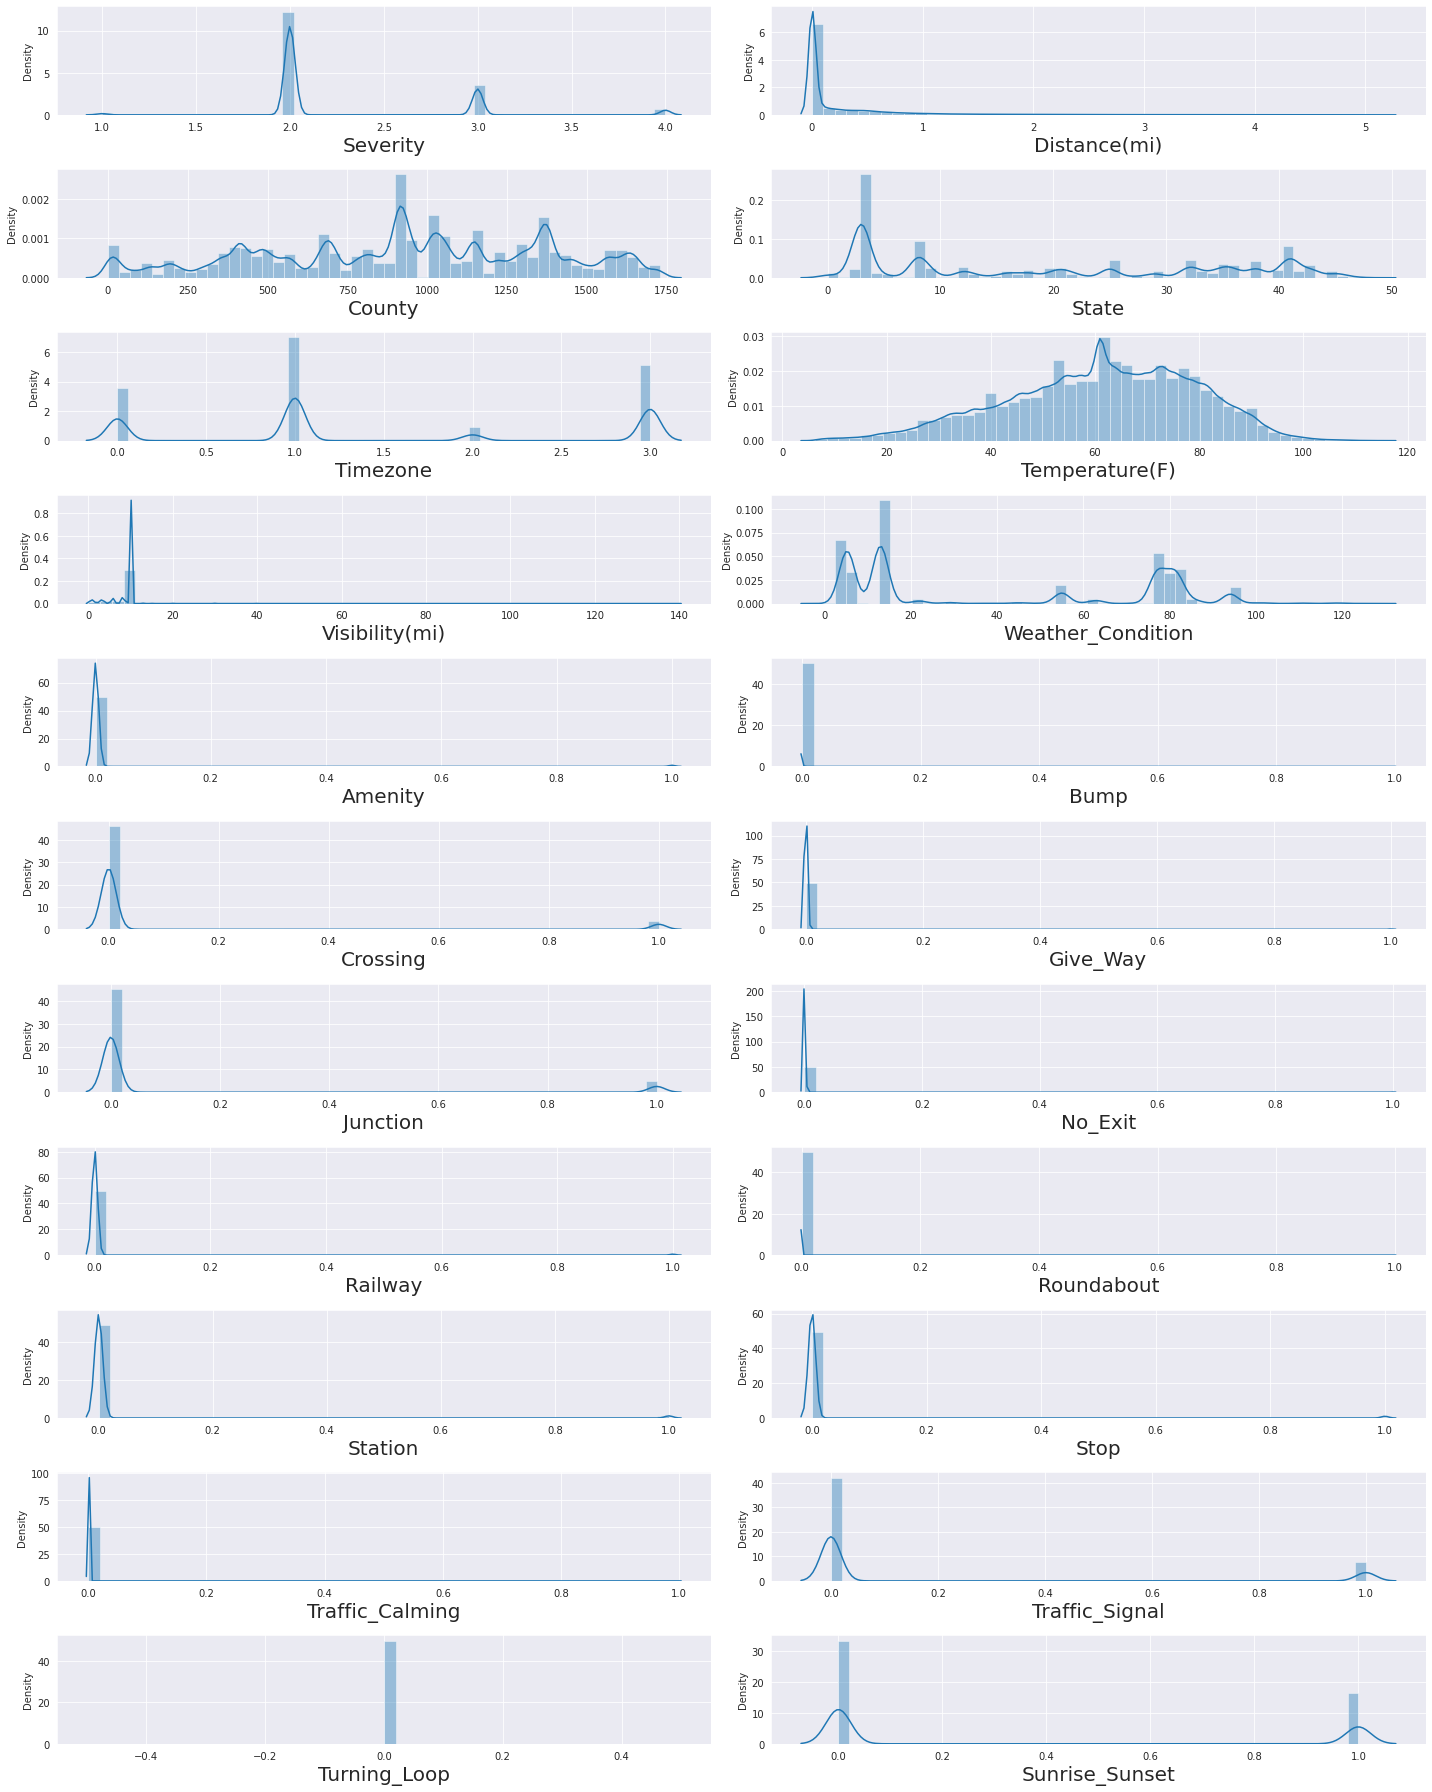

In [67]:
# let us now see the distribution of the "Train dataset"

plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1

for column in df:
    if plotnumber <=22:
        ax = plt.subplot(11,2, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Splitting up of dataset with x (features) and y (target column)

In [68]:
# splitting the columns

x = df.drop(columns = ["Severity"])
y = df["Severity"]

# Lets us now Scale the data for further processing using StandardScaler

In [69]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.4309884 , -0.62014854,  1.18809465, ..., -0.43317141,
         0.        , -0.70260313],
       [-0.4309884 ,  0.19149356,  0.34253288, ..., -0.43317141,
         0.        , -0.70260313],
       [ 1.72779166,  1.05769983, -1.0884178 , ..., -0.43317141,
         0.        ,  1.42327861],
       ...,
       [-0.26445394,  0.23241669, -0.76320174, ..., -0.43317141,
         0.        , -0.70260313],
       [-0.4309884 ,  1.00768267,  1.4482675 , ..., -0.43317141,
         0.        ,  1.42327861],
       [-0.4309884 , -0.9498071 , -1.02337459, ...,  2.30855496,
         0.        , -0.70260313]])

In [70]:
df["Severity"].value_counts()

2    2106756
3     616020
4     110001
1      28497
Name: Severity, dtype: int64

# Split the dataset into train and test data set

#### I have considered 30% test data and a random state of 200

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.30, random_state = 200)

#Create multi output classification models
#I have considered 3 ML models in this scenario

### 1) DecisionTreeClassifier 

In [72]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7450357241464475
[[  2979   4659    702     82]
 [  4091 540789  73729  14207]
 [   993  95660  82279   5222]
 [   112  14205   5195  13479]]
              precision    recall  f1-score   support

           1       0.36      0.35      0.36      8422
           2       0.83      0.85      0.84    632816
           3       0.51      0.45      0.48    184154
           4       0.41      0.41      0.41     32991

    accuracy                           0.75    858383
   macro avg       0.53      0.52      0.52    858383
weighted avg       0.74      0.75      0.74    858383



### 2) HistGradientBoostingClassifier

In [73]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hist_reg = HistGradientBoostingClassifier()
hist_reg.fit(x_train,y_train)

y_pred = hist_reg.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7719001890764379
[[  1514   6409    491      8]
 [  1403 598278  31534   1601]
 [   145 124157  58681   1171]
 [    53  27079   1746   4113]]
              precision    recall  f1-score   support

           1       0.49      0.18      0.26      8422
           2       0.79      0.95      0.86    632816
           3       0.63      0.32      0.42    184154
           4       0.60      0.12      0.21     32991

    accuracy                           0.77    858383
   macro avg       0.63      0.39      0.44    858383
weighted avg       0.75      0.77      0.74    858383



### 3) AdaBoostClassifier

In [74]:
from sklearn.ensemble import AdaBoostClassifier

ad_class = AdaBoostClassifier()
ad_class.fit(x_train,y_train)

y_pred = ad_class.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7365301968934613
[[     0   8302    119      1]
 [     0 622629  10090     97]
 [     0 174546   9576     32]
 [     0  32597    374     20]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00      8422
           2       0.74      0.98      0.85    632816
           3       0.48      0.05      0.09    184154
           4       0.13      0.00      0.00     32991

    accuracy                           0.74    858383
   macro avg       0.34      0.26      0.24    858383
weighted avg       0.65      0.74      0.64    858383



# Check if the model is overfitting

In [75]:
from sklearn.model_selection import cross_val_score

In [76]:
scr = cross_val_score(dt, x, y, cv=3)
print("Cross Validation score of DecisionTree model is:", scr.mean())

Cross Validation score of DecisionTree model is: 0.7429092774756979


In [77]:
scr = cross_val_score(hist_reg, x, y, cv=3)
print("Cross Validation score of HistGradientBoostingClassifier model is:", scr.mean())

Cross Validation score of HistGradientBoostingClassifier model is: 0.7718047974433766


In [78]:
scr = cross_val_score(ad_class, x, y, cv=3)
print("Cross Validation score of AdaBoostClassifier model is:", scr.mean())

Cross Validation score of AdaBoostClassifier model is: 0.7364202100183345


# Selecting the best ML model for this dataset
#### From the above algorithms AdaBoostClassifier has lowest difference between accuracy score and cross validation compared ot other models.

#### In this case this alogorithms seems to be the best one

| Models used | Model Accuracy | Cross Validation | Difference output |
| --- | --- | --- |---|
| DecisionTreeClassifier | 0.745102128071035 | 0.742907180507704 | 0.00219494756333105 |
| HistGradientBoostingClassifier | 0.7724966594166 | 0.771741189414226 | 0.00075547000237397 |
| AdaBoostClassifier | 0.736530196893461 | 0.736420210018334 | 0.000109986875126977 |


# Hyper Parameter Tuning
### Let us try to tune the proposed model (AdaBoostClassifier) to get better accuracy, if possible
### The "paramaters" have been selected from the skicit library and I have considered 4 paramaters

In [79]:
parameters = {"n_estimators":[10, 30, 50],
              "algorithm":["SAMME", "SAMME.R"],
              "learning_rate":[1, 2, 3],
              "random_state":[100, 150, 200],
              }

# GridSearchCV is used to tune the parameters by fitting the same to the training dataset

In [80]:
from sklearn.model_selection import GridSearchCV
GCV = GridSearchCV(AdaBoostClassifier(), parameters, cv=3)

In [81]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [1, 2, 3],
                         'n_estimators': [10, 30, 50],
                         'random_state': [100, 150, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [82]:
GCV.best_params_

{'algorithm': 'SAMME',
 'learning_rate': 1,
 'n_estimators': 10,
 'random_state': 100}

## Rebuild the model using the appropriate params we recieved from best_params_

### Its observed that the model accuracy was approximately 73.65 % earlier and post Hyper Parameter tuning its now approximately 73.72 % better

In [83]:
mod_ada_class = AdaBoostClassifier(algorithm= "SAMME", learning_rate= 1, n_estimators= 10, random_state= 100)

mod_ada_class.fit(x_train,y_train)
pred = mod_ada_class.predict(x_test)
print(accuracy_score(y_test,pred)*100)

73.72187007431414


# Saving the model (using joblib)

In [84]:
# Saving the model

import joblib
joblib.dump(mod_ada_class,"US_Accidents_Prediction.pkl")

['US_Accidents_Prediction.pkl']

# Loading the saved model

In [85]:
model = joblib.load("US_Accidents_Prediction.pkl")

In [86]:
prediction = model.predict(x_test)

In [87]:
prediction=pd.DataFrame(prediction)
prediction

,0
0,2
1,2
2,2
3,2
4,2
...,...
858378,2
858379,2
858380,2
858381,2
